In [64]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

(1080, 1920, 3)


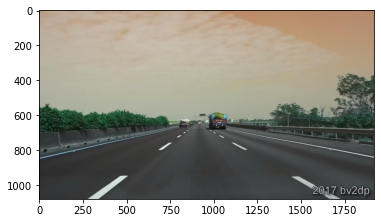

In [65]:
#%% Load video
P = './data'
V = 'tw_NH1.mp4'
cap = cv2.VideoCapture(os.path.join(P, V))
 
while(cap.isOpened()):
    ret, frame = cap.read()
    vd = frame
    break

fig_0 = plt.figure(0)
print(vd.shape)
plt.imshow(vd)
plt.show()

In [66]:
#%%
src = np.float32(
            [[280, 1080],  # Bottom left
             [709, 780],  # Top left
             [1162, 780],  # Top right
             [1730, 1080]]) # Bottom right

dst = np.float32(
            [[280, 1080],  # Bottom left
             [280, 0],  # Top left
             [1730, 0],  # Top right
             [1730, 1080]]) # Bottom right 

vd_size = (vd.shape[1], vd.shape[0])
M = cv2.getPerspectiveTransform(src, dst)
M_inv = cv2.getPerspectiveTransform(dst, src)
vd_warped = cv2.warpPerspective(vd, M, vd_size) 

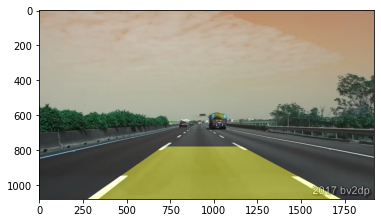

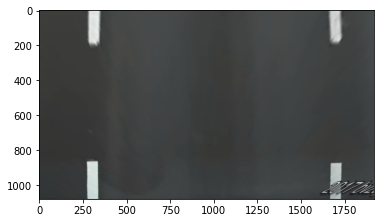

In [67]:
#%%
region = np.zeros((vd.shape[0], vd.shape[1], 3), np.uint8)
cv2.fillConvexPoly(region, np.int_([src]), (100, 100, 0))
region_mask = cv2.addWeighted(vd, 1, region, 1, 0)

fig_1 = plt.figure(1)
plt.imshow(region_mask)
fig_2 = plt.figure(2)
plt.imshow(vd_warped)